In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import json

**Twitter edgelist**

Mutual followership based network ties between census tracts in Boston, New York and Detroit.   <br>
```cbsacode```, ```cbsaname``` : code and name of the metropolitan area<br>
```tract_home1```, ```tract_home2``` : connected census tracts -- based on the infered home location of users    <br>
```nr_ties``` : number of mutual followership based online social connections between the two census tracts<br>


In [2]:
# Twitter connections between census tracts
edgelist = pd.read_csv("../data/twitter_tract_tract_edgelist.csv", sep=";")
edgelist.head()

,cbsacode,cbsaname,tract_home1,tract_home2,nr_ties
0,35620,New York,14000US34003001000,14000US34003003402,1
1,35620,New York,14000US34003001000,14000US34003003500,1
2,35620,New York,14000US34003001000,14000US34003004001,1
3,35620,New York,14000US34003001000,14000US34003023100,1
4,35620,New York,14000US34003001000,14000US34003042500,1


**American Community Survey data**

Census tract level socio-economic indicators for US metro areas

In [3]:
# ACS data 2012-2022 -- join through tract IDs
census_data = pd.read_csv("../data/acs_data_census_tracts_2012_2020.csv.gz", compression="gzip")
census_data.head()

,tract_id,population2012,income2012,education_bachelor2012,education_total2012,race_total2012,white2012,black2012,native2012,asian2012,...,asian2019,population2020,education_bachelor2020,education_total2020,income2020,race_total2020,white2020,black2020,native2020,asian2020
0,14000US34003001000,6549,55598.0,1689,4197,6549,5685,150,0,642,...,744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14000US34003002100,2006,100874.0,584,1465,2006,1418,27,5,529,...,478,1459.0,484.0,1052.0,99410.0,1459.0,893.0,44.0,0.0,473.0
2,14000US34003002200,5151,36357.0,930,3638,5151,3820,48,0,1213,...,1370,5561.0,1556.0,3867.0,51239.0,5561.0,3426.0,193.0,7.0,1714.0
3,14000US34003002300,5729,37859.0,1343,3939,5729,3793,107,0,1773,...,1653,5789.0,1280.0,3953.0,54681.0,5789.0,3652.0,15.0,15.0,1840.0
4,14000US34003003100,5068,34507.0,940,3677,5068,2483,457,0,1198,...,1369,5670.0,1401.0,4060.0,34545.0,5670.0,2865.0,587.0,0.0,1680.0


**Shape files**

In [4]:
# read shapefile
metro_shape = gpd.read_file("../data/shapes/metro_areas.shp")
metro_shape.head()

,cbsacode,geometry
0,12060,"POLYGON ((-85.33823 33.65312, -85.33842 33.654..."
1,12420,"POLYGON ((-98.04989 30.62416, -98.04954 30.624..."
2,12580,"POLYGON ((-77.16808 39.35396, -77.16831 39.354..."
3,13820,"POLYGON ((-86.95366 33.8153, -86.95365 33.8202..."
4,14460,"POLYGON ((-71.24734 43.27523, -71.24732 43.275..."


<Axes: >

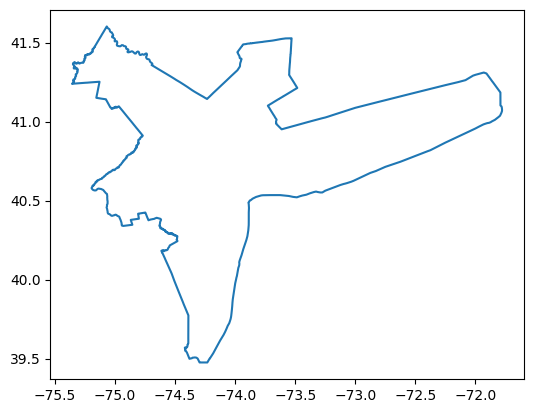

In [5]:
# plot New York
metro_shape[metro_shape["cbsacode"]==35620].boundary.plot()

In [6]:
# tract geometries -- 
tract_geoms = gpd.GeoDataFrame.from_features(
    [json.loads(e.strip('\n')) for e in open('../data/shapes/censustract_geoms_top50.geojson').readlines()]
)
tract_geoms.head()

,geometry,aland,awater,display_name,full_geoid,population,simple_name,sumlevel
0,"POLYGON ((-73.96209 40.96962, -73.95826 40.983...",4655526,11144,"Census Tract 70.02, Bergen, NJ",14000US34003007002,4751,Census Tract 70.02,140
1,"POLYGON ((-73.97598 40.95429, -73.97552 40.957...",5365613,19159,"Census Tract 91, Bergen, NJ",14000US34003009100,5007,Census Tract 91,140
2,"POLYGON ((-73.9983 40.80848, -73.99783 40.809,...",736569,0,"Census Tract 63, Bergen, NJ",14000US34003006300,8013,Census Tract 63,140
3,"POLYGON ((-73.98915 40.9093, -73.98861 40.9117...",2026199,5573,"Census Tract 152, Bergen, NJ",14000US34003015200,5922,Census Tract 152,140
4,"POLYGON ((-73.98486 40.87487, -73.9845 40.8755...",3704990,21986,"Census Tract 155, Bergen, NJ",14000US34003015500,5854,Census Tract 155,140


/var/folders/9d/8j37_fks51x11mk0_zwqsd940000gn/T/ipykernel_46083/1292126517.py:5: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4269

  nyc_tracts = gpd.sjoin(tract_geoms, nyc_shape, predicate="within")


(np.float64(-75.3614102),
 np.float64(-71.6803878),
 np.float64(39.40552965),
 np.float64(41.59671535))

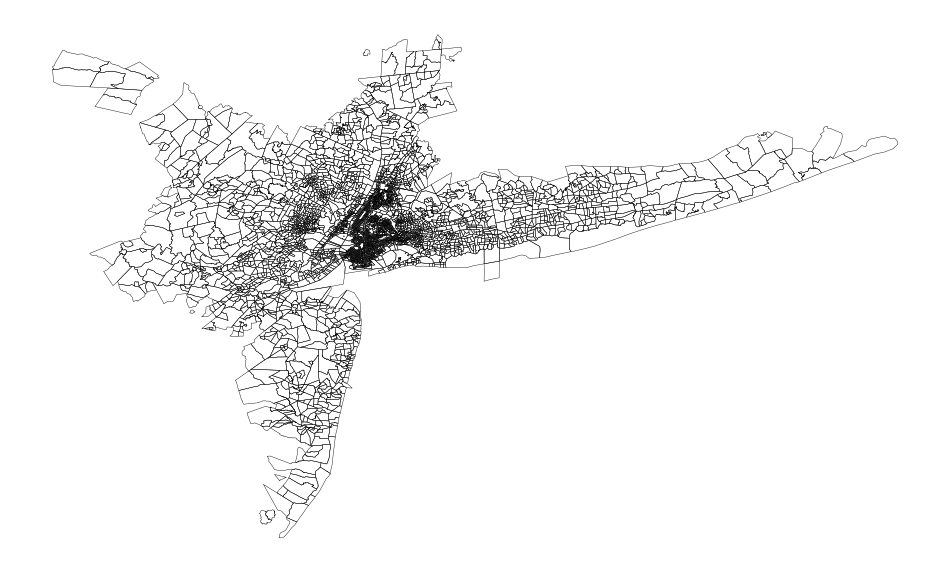

In [7]:
# New York big shape
nyc_shape = metro_shape[metro_shape["cbsacode"]==35620]

# tracts inside New York
nyc_tracts = gpd.sjoin(tract_geoms, nyc_shape, predicate="within")

# plot
fig, ax = plt.subplots(1,1, figsize=(12,8))
nyc_tracts.boundary.plot(ax=ax, color="black", linewidth=0.3)
ax.axis("off")